In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/EMNS/webm_metadata.csv", sep="|")

print("Total number of samples: {}".format(len(df)))
df.head()

Total number of samples: 1205


,id,utterance,description,emotion,date_created,status,gender,age,level,audio_recording,user_id
0,1,Hannu wrote of his expedition in stone.,{user_id} said {transcription} in a {emotion} ...,Sarcastic,2022-05-04 15:57:16.957078,Complete,Female,20s,3,wavs/recorded_audio_A0MwoOW.webm,3
1,2,Little India differs from many other neighbour...,{transcription} said {user_id} in a {emotion} ...,Excited,2022-05-04 16:04:21.841726,Complete,Female,20s,6,wavs/recorded_audio_nZB5ujA.webm,3
2,3,Users had the ability to vote on the songs the...,{user_id} said {transcription} With a {emotion...,Neutral,2022-05-04 16:24:47.767515,Complete,Female,20s,0,wavs/recorded_audio.webm,3
3,4,"His major sponsor is Algario Communications, a...","In an {emotion} voice, {user_id} says {transcr...",Surprised,2022-05-04 16:09:25.118523,Complete,Female,20s,8,wavs/recorded_audio_6emr1kD.webm,3
4,5,The mansion also has a marriage office.,"In an {emotion} voice, {user_id} says {transcr...",Sarcastic,2022-05-11 10:29:13.448873,Complete,Female,20s,4,wavs/recorded_audio_ReBGM47.webm,3


emotion
Disgust      165
Happy        158
Excited      155
Surprised    153
Sad          150
Neutral      149
Sarcastic    142
Angry        133
Name: count, dtype: int64


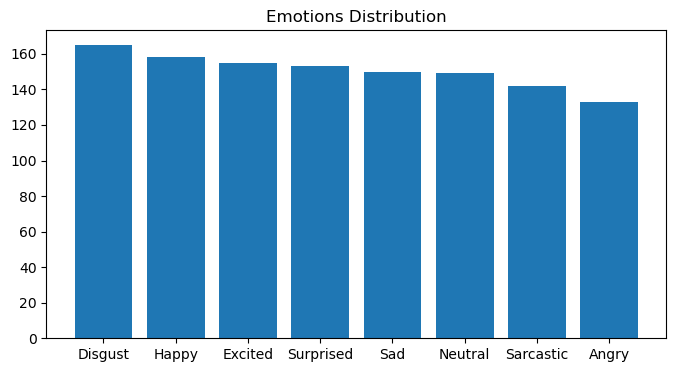

In [4]:
emotions_count = df["emotion"].value_counts()

print(emotions_count)

plt.figure(figsize=(8, 4))
plt.bar(emotions_count.index, emotions_count.values)
plt.title("Emotions Distribution")
plt.show()

status
Complete          1181
Needs Updating      24
Name: count, dtype: int64


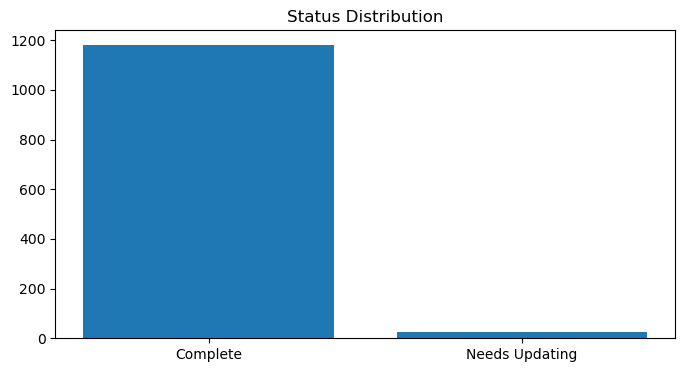

In [5]:
status_count = df["status"].value_counts()

print(status_count)

plt.figure(figsize=(8, 4))
plt.bar(status_count.index, status_count.values)
plt.title("Status Distribution")
plt.show()

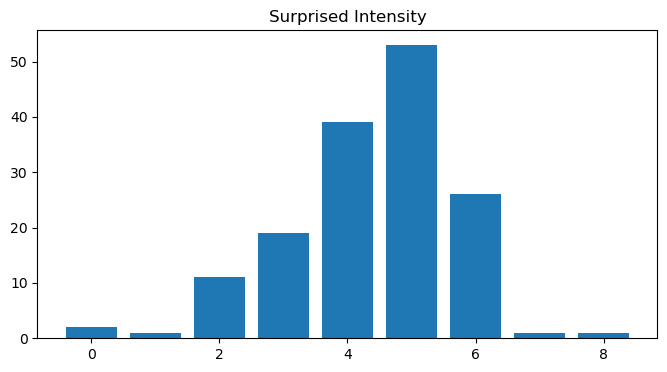

In [6]:
surprised_intensity = df[df["emotion"] == "Surprised"]["level"].value_counts()

plt.figure(figsize=(8, 4))
plt.bar(surprised_intensity.index, surprised_intensity.values)
plt.title("Surprised Intensity")
plt.show()

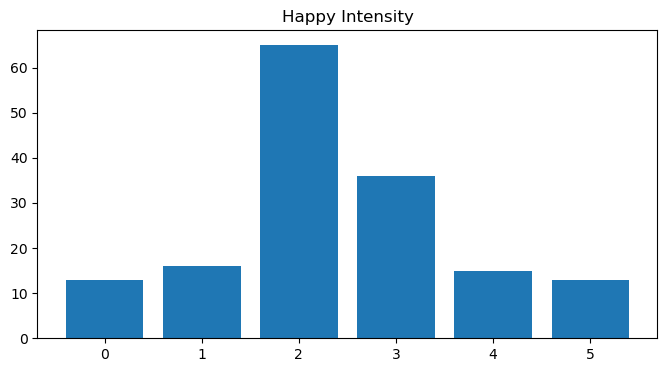

In [7]:
happy_intensity = df[df["emotion"] == "Happy"]["level"].value_counts()

plt.figure(figsize=(8, 4))
plt.bar(happy_intensity.index, happy_intensity.values)
plt.title("Happy Intensity")
plt.show()

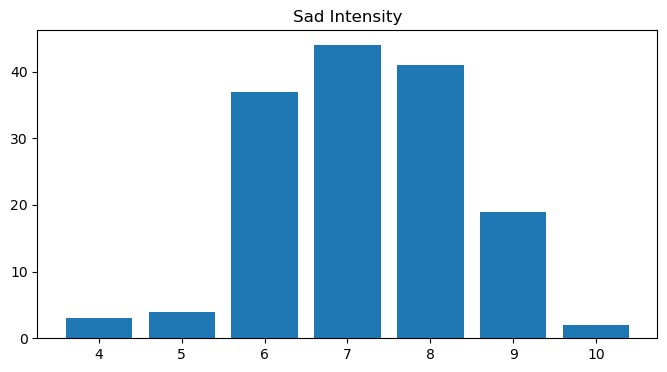

In [8]:
sad_intensity = df[df["emotion"] == "Sad"]["level"].value_counts()

plt.figure(figsize=(8, 4))
plt.bar(sad_intensity.index, sad_intensity.values)
plt.title("Sad Intensity")
plt.show()

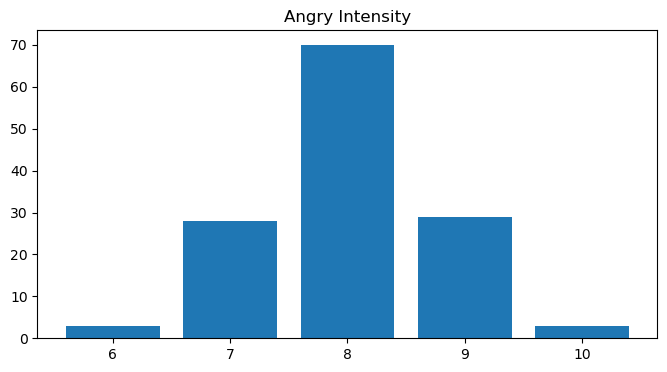

In [9]:
angry_intensity = df[df["emotion"] == "Angry"]["level"].value_counts()

plt.figure(figsize=(8, 4))
plt.bar(angry_intensity.index, angry_intensity.values)
plt.title("Angry Intensity")
plt.show()

In [12]:
df["audio_recording"] = (
    df["audio_recording"].str.replace("wavs/", "").str.replace("webm", "wav")
)
df = df[df["status"] == "Complete"]

print("Total number of samples: {}".format(len(df)))
df.head()

Total number of samples: 1181


,id,utterance,description,emotion,date_created,status,gender,age,level,audio_recording,user_id
0,1,Hannu wrote of his expedition in stone.,{user_id} said {transcription} in a {emotion} ...,Sarcastic,2022-05-04 15:57:16.957078,Complete,Female,20s,3,recorded_audio_A0MwoOW.wav,3
1,2,Little India differs from many other neighbour...,{transcription} said {user_id} in a {emotion} ...,Excited,2022-05-04 16:04:21.841726,Complete,Female,20s,6,recorded_audio_nZB5ujA.wav,3
2,3,Users had the ability to vote on the songs the...,{user_id} said {transcription} With a {emotion...,Neutral,2022-05-04 16:24:47.767515,Complete,Female,20s,0,recorded_audio.wav,3
3,4,"His major sponsor is Algario Communications, a...","In an {emotion} voice, {user_id} says {transcr...",Surprised,2022-05-04 16:09:25.118523,Complete,Female,20s,8,recorded_audio_6emr1kD.wav,3
4,5,The mansion also has a marriage office.,"In an {emotion} voice, {user_id} says {transcr...",Sarcastic,2022-05-11 10:29:13.448873,Complete,Female,20s,4,recorded_audio_ReBGM47.wav,3


In [13]:
df.to_csv("../data/EMNS/wav_metadata.csv", index=False)